# Part 1-1)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import *
from math import *
import numpy as np
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns

In [ ]:
def prob_calc(n,k):
    candidate=[i for i in range(n)];
    num_iterations=10000
    summation=0
    for i in range(num_iterations):
        shuffle(candidate)
        cand_list=[candidate[m] for m in range(0,k)]
        for j in range(k,n):
          if candidate[j]>np.max(cand_list):
                if candidate[j]==n-1:
                    summation+=1
                break
    return summation/num_iterations

Text(30, 0.22319999999999998, 'k=35, p≈0.3732')

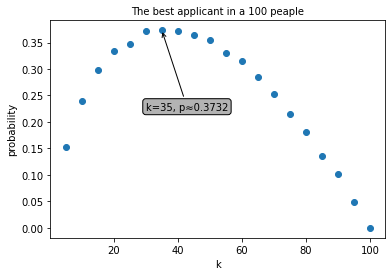

In [ ]:
n=100
prob_array=[prob_calc(n,k) for k in range(5,101,5)]
k=[i for i in range(5,101,5)]
scatter(k,prob_array)
title('The best applicant in a 100 peaple',fontsize=10)
xlabel('k',fontsize=10)
ylabel('probability',fontsize=10)
p_max_index=prob_array.index(max(prob_array))
bbox = dict(boxstyle ="round", fc ="0.7")
arrowprops = dict(arrowstyle = "->")
annotate(f'k={k[p_max_index]}, p≈{max(prob_array)}',xy=(k[p_max_index],
             max(prob_array)),xytext=(k[p_max_index]-5,max(prob_array)-0.15),
             bbox = bbox, arrowprops = arrowprops)

# Part 1-2)

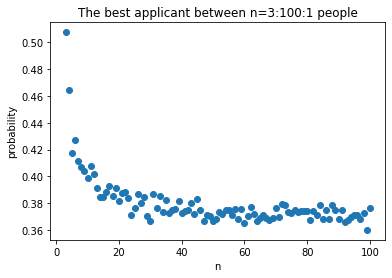

In [ ]:
prob_array=[prob_calc(n,int(n/exp(1))) for n in range(3,101)]
n=[i for i in range(3,101)]
scatter(n,prob_array)
title('The best applicant between n=3:100:1 people')
xlabel('n')
ylabel('probability')
p_max_index=prob_array.index(max(prob_array))